In [ ]:
import tensorflow as tf

from tensorflow.keras.utils import get_file, image_dataset_from_directory

### ```Hallo```

In [ ]:
orifile = "https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip"

extract = !False

get_file(origin=orifile, cache_dir="/tmp", extract=extract)

In [ ]:
base_dir = "/tmp/datasets/rockpaperscissors/rps-cv-images"

batch_size = 128; image_size = (150, 150); validation_split = 0.3; seed = 404

(train, testi) = image_dataset_from_directory(
    base_dir,
    batch_size=batch_size,
    image_size=image_size,
    subset="both", seed=seed,
    validation_split=validation_split,
    interpolation="nearest"
)

output_node = len(train.class_names)

In [ ]:
def relayer(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.math.divide(image, 255.0)
    return image, label

train = train.map(relayer).shuffle(100).cache()

testi = testi.map(relayer)

### ```Model```

In [ ]:
import tensorflow as tf

from tensorflow.keras import layers, Model

from Inter import Modelin, Modeler

model_one = Modelin()

train = train.map(lambda i, l : (model_one(i), l))
testi = testi.map(lambda i, l : (model_one(i), l))

In [ ]:
model = Modeler(output_node)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

hist = model.fit(train, epochs=8, verbose=1, validation_data=testi)

### ```Hasil```

In [ ]:
model.evaluate(train, verbose=0)

[0.22149191796779633, 0.9379895329475403]

In [ ]:
model.evaluate(testi, verbose=0)

[0.2092522382736206, 0.9390243887901306]

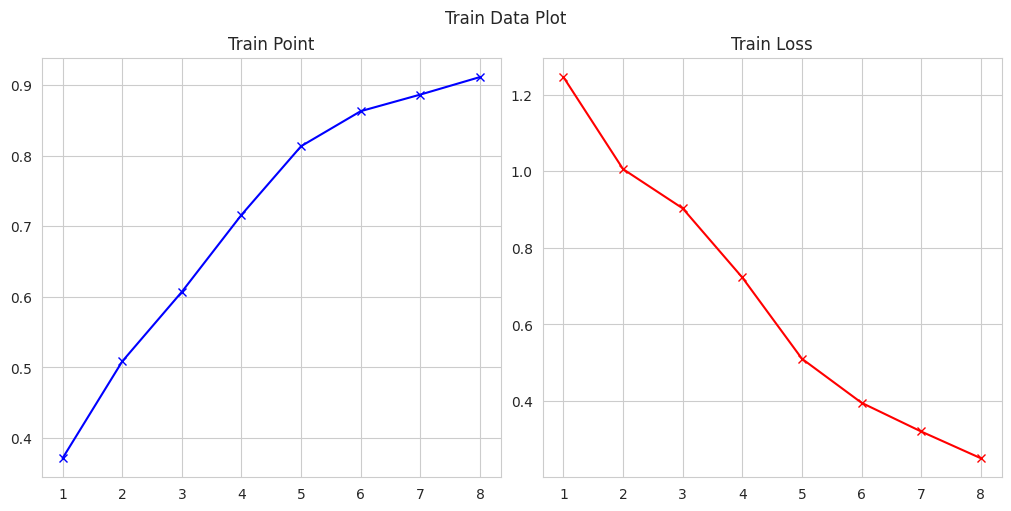

In [ ]:
from Histplot import Histplot

image_hist = Histplot(hist, hist_acc="accuracy")

image_hist.Trainplot()

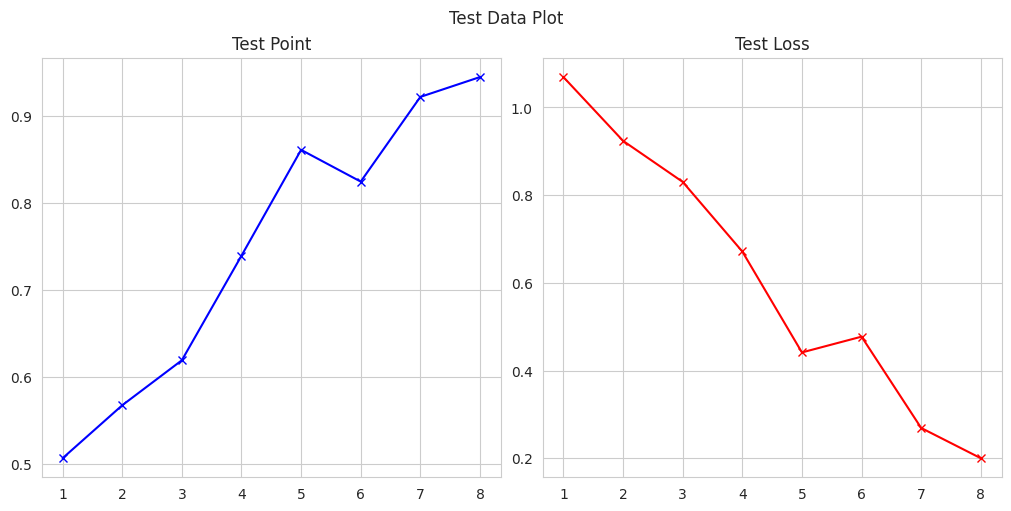

In [ ]:
image_hist.Testiplot()

In [ ]:
!apt-get install tensorflow-model-server

In [ ]:
import os

model_folder = "/tmp/model"

os.mkdir(model_folder)

In [ ]:
model_serial = "1"

model_path = os.path.join(model_folder, model_serial)

tf.saved_model.save(model, model_path)

In [ ]:
os.environ["ModelFolder"] = model_folder

In [ ]:
%%bash --bg
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=inter_model \
  --model_base_path="${ModelFolder}"

In [ ]:
!tail server.log

In [ ]:
import json, requests

test_img, test_label = next(iter(testi))

test_img = test_img.numpy().tolist()

url = "http://127.0.0.1:8501/v1/models/inter_model:predict"

In [ ]:
from Hela import Modeler

Modeler(test_img, url, output="max")

array([2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       2, 2, 2, 2, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 1, 0, 1, 1, 2, 2, 0, 0, 1,
       2, 0, 0, 0, 1, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 2, 1, 0,
       0, 2, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 2, 1])

In [ ]:
logits = Modeler(test_img, url, output="original")

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

loss_i = loss_fn(test_label, logits)

loss_i.numpy()

0.25049207

### ```Optional```


In [ ]:
api_path = "/modelapi"

os.mkdir(api_path)

model.save("/modelapi", save_format="tf")

In [ ]:
modelapi = tf.keras.models.load_model("/modelapi")

modelapi.evaluate(testi, verbose=0)

[0.2180914282798767, 0.9314024448394775]

In [ ]:
from tensorflow.keras.preprocessing import image

image_t = "/tmp/datasets/rockpaperscissors/paper/04l5I8TqdzF9WDMJ.png"

img = image.load_img(image_t, target_size=(150, 150))

rimg = image.img_to_array(img)

rimg.shape

(150, 150, 3)

In [ ]:
timg = tf.expand_dims(rimg, axis=0)

modelapi.predict(timg, verbose=0)

array([[1., 0., 0.]], dtype=float32)

In [ ]:
def helper(image_path : str):
  load_image  = image.load_img(image_path, target_size=(150, 150))
  image_array = image.img_to_array(load_image)
  img = tf.expand_dims(image_array, axis=0)
  result = modelapi.predict(img, verbose=0)
  return result

helper(image_t)

array([[1., 0., 0.]], dtype=float32)